In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time as time

In [2]:
customer_data = r"C:\Users\LouisJohnson\Documents\Simplilearn\Capstone\Datasets\Datasets\customer loan data clean.csv"

In [3]:
df = pd.read_csv(customer_data)

##### changing dots to underscores

In [4]:
_columns = [sub.replace('.','_') for sub in df.columns]

In [5]:
df.columns = _columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

### Data wrangling

##### Step 1: Null values

In [7]:
null_values = df.isnull()

for column in null_values.columns.values.tolist():
    print(column)
    print(null_values[column].value_counts())
    print(" ")

UniqueID
False    233154
Name: UniqueID, dtype: int64
 
disbursed_amount
False    233154
Name: disbursed_amount, dtype: int64
 
asset_cost
False    233154
Name: asset_cost, dtype: int64
 
ltv
False    233154
Name: ltv, dtype: int64
 
branch_id
False    233154
Name: branch_id, dtype: int64
 
supplier_id
False    233154
Name: supplier_id, dtype: int64
 
manufacturer_id
False    233154
Name: manufacturer_id, dtype: int64
 
Current_pincode_ID
False    233154
Name: Current_pincode_ID, dtype: int64
 
Date_of_Birth
False    233154
Name: Date_of_Birth, dtype: int64
 
Employment_Type
False    225493
True       7661
Name: Employment_Type, dtype: int64
 
DisbursalDate
False    233154
Name: DisbursalDate, dtype: int64
 
State_ID
False    233154
Name: State_ID, dtype: int64
 
Employee_code_ID
False    233154
Name: Employee_code_ID, dtype: int64
 
MobileNo_Avl_Flag
False    233154
Name: MobileNo_Avl_Flag, dtype: int64
 
Aadhar_flag
False    233154
Name: Aadhar_flag, dtype: int64
 
PAN_flag
False    

#### The employment type column has null values. We drop these

In [8]:
df["Employment_Type"].isnull().value_counts()

False    225493
True       7661
Name: Employment_Type, dtype: int64

In [9]:
df = df.dropna()

#### Duplicate values

In [10]:
df.sort_values("UniqueID",inplace = True)

df.reset_index(drop=True, inplace=True)

In [11]:
df.duplicated().value_counts()

False    225493
dtype: int64

#### We observe no instances of duplicate rows 

In [12]:
df["UniqueID"].duplicated().value_counts()

False    225493
Name: UniqueID, dtype: int64

#### We also observe no such instances of duplicate ID entries, therefore the unique constraint holds

#### Step 3: Data types

#### Date of birth and distribution date are objects instead of Date types

In [13]:
df.loc[:, "DisbursalDate"] = pd.to_datetime(df["DisbursalDate"], infer_datetime_format=True)

In [14]:
df.loc[:, "Date_of_Birth"] = pd.to_datetime(df["Date_of_Birth"], infer_datetime_format=True)

In [15]:
df[["DisbursalDate","Date_of_Birth"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225493 entries, 0 to 225492
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DisbursalDate  225493 non-null  datetime64[ns]
 1   Date_of_Birth  225493 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.4 MB


### Dropping Irrelevant rows

In [16]:
df = df.drop(["CREDIT_HISTORY_LENGTH","AVERAGE_ACCT_AGE","Employee_code_ID"], axis = 'columns')

## Sanity checks

In [17]:
df[["loan_default","disbursed_amount", "asset_cost", "ltv", "PERFORM_CNS_SCORE", "PRI_NO_OF_ACCTS", "PRI_OVERDUE_ACCTS","CREDIT_HISTORY_LENGTH_MONTHS","AVERAGE_ACCT_AGE_MONTHS","DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS"]].describe()

,loan_default,disbursed_amount,asset_cost,ltv,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,CREDIT_HISTORY_LENGTH_MONTHS,AVERAGE_ACCT_AGE_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
count,225493.000000,225493.00000,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000
mean,0.217155,54240.72883,7.563113e+04,74.806634,293.040449,2.462360,0.158989,13.961107,8.833210,0.098708
std,0.412310,12775.59006,1.852758e+04,11.441890,338.874784,5.223012,0.553415,21.586951,14.184849,0.386376
min,0.000000,13320.00000,3.700000e+04,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,47049.00000,6.562500e+04,68.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,53703.00000,7.080700e+04,76.890000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,60213.00000,7.896600e+04,83.730000,680.000000,3.000000,0.000000,22.000000,13.000000,0.000000
max,1.000000,987354.00000,1.328954e+06,95.000000,890.000000,453.000000,25.000000,119.000000,119.000000,20.000000


### Outlier treatment

For the disbursed amount the maximum value is more than 20 times the mean and more than 10 times the upper quartile. We remove all values above the 99 percentile

In [18]:
def remove_outliers(df, column):
    column_q = df[column].quantile(0.999)
    return df[df[column] < column_q]

In [19]:
df = remove_outliers(df, "disbursed_amount")

For the asset cost the max value is 100 times greater than the mean. We remove outliers above the 99.9 percentile 

In [20]:
df = remove_outliers(df, "asset_cost")

For the pior number of accounts, prior overdue accounts and delinquent accounts in the last six months, the max is greater than 200 times the mean, removing outliers above the 99th percentile

In [21]:
df.shape

(225031, 40)

In [22]:
## Removing outliers from the primary and secondary account columns for values above the 99.9th percentile

## Number of account columns showed values greater than 1000 times the mean

df = remove_outliers(df, "PRI_NO_OF_ACCTS")

df = remove_outliers(df, "SEC_NO_OF_ACCTS")

In [23]:
## Primary overdue accounts showed values greater then 100 times the mean
df = remove_outliers(df, "PRI_OVERDUE_ACCTS")

In [24]:
### Current account balances showed values greater than 8 million when the mean was around 50 thousand

df = remove_outliers(df, "PRI_CURRENT_BALANCE")
df = remove_outliers(df, "SEC_CURRENT_BALANCE")

In [25]:
## Present are accounts greater than 1000 times the mean
df = remove_outliers(df, "PRI_SANCTIONED_AMOUNT")
df = remove_outliers(df, "SEC_SANCTIONED_AMOUNT")

## Binning continuous variables

In [26]:
### Binning disbursed_amount

bins1 = [0,15000,30000,45000,60000,75000]
bins_labels1 = ['0-15,000','15,000-30,000','30,000-45,000','45,000-60,000','60,000+']

df["disbursed_amount_range"] = pd.cut(df["disbursed_amount"],bins1, labels=bins_labels1)

## Binning Average account age and credit history length

bins2 = [0,12,24,36,48,60,72,84,96,108,120]
bins_labels2 = ['<1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years', '6-7 years', '7-8 years', '8-9 years', '9-10 years']
df["AVERAGE_ACCT_AGE_MONTHS_RANGE"] = pd.cut(df["AVERAGE_ACCT_AGE_MONTHS"],bins2,labels=bins_labels2)

df["CREDIT_HISTORY_LENGTH_MONTHS_RANGE"] = pd.cut(df["CREDIT_HISTORY_LENGTH_MONTHS"],bins2,labels=bins_labels2)

## Binning asset cost
bins3 = [0,40000,80000,120000,160000,200000]
bins_labels3 = ['< 40,000', '40,000-80,000','80,000-120,000','120,000-160,000','160,000+']

df["asset_cost_range"] = pd.cut(df["asset_cost"],bins3,labels=bins_labels3)

### Number of primary and secondary accounts bins
bins4 = [0,2,4,6,8,47]
bins_labels4 = ["<2","2-4","4-6","6-8","8+"]
df["PRI_NO_OF_ACCTS_RANGE"] = pd.cut(df["PRI_NO_OF_ACCTS"],bins4,labels=bins_labels4)
df["SEC_NO_OF_ACCTS_RANGE"] = pd.cut(df["SEC_NO_OF_ACCTS"],bins4,labels=bins_labels4)

### Current Balance bins
bins10 = [-100000,0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,8504128]
bins_labels10 = ["<0","0-100,000","100,000-200,000","200,000-300,000","300,000-400,000","400,000-500,000","500,000-600,000","600,000-700,000","700,000-800,000","800,000-900,000","900,000-1million","1million+"]

df["PRI_CURRENT_BALANCE_RANGE"] = pd.cut(df["PRI_CURRENT_BALANCE"],bins10,labels=bins_labels10)
df["SEC_CURRENT_BALANCE_RANGE"] = pd.cut(df["SEC_CURRENT_BALANCE"],bins10,labels=bins_labels10)

## Sanctioned amount bins
bins11 = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,8504128]
bins_labels11 = ["0-100,000","100,000-200,000","200,000-300,000","300,000-400,000","400,000-500,000","500,000-600,000","600,000-700,000","700,000-800,000","800,000-900,000","900,000-1million","1million+"]

df["PRI_SANCTIONED_AMOUNT_RANGE"] = pd.cut(df["PRI_SANCTIONED_AMOUNT"],bins11,labels=bins_labels11)
df["SEC_SANCTIONED_AMOUNT_RANGE"] = pd.cut(df["SEC_SANCTIONED_AMOUNT"],bins11,labels=bins_labels11)

### Disbursed amount
df["PRI_DISBURSED_AMOUNT_RANGE"] = pd.cut(df["PRI_DISBURSED_AMOUNT"],bins11,labels=bins_labels11)
df["SEC_DISBURSED_AMOUNT_RANGE"] = pd.cut(df["SEC_DISBURSED_AMOUNT"],bins11,labels=bins_labels11)

## New accounts in last six months bins
bins6 = [0,2,4,6,8,10,12,14,28]
bins_names6 = ["<2","2-4","4-6","6-8","8-10","10-12","12-14","14+"]

df["NEW_ACCTS_IN_LAST_SIX_MONTHS_RANGE"] = pd.cut(df["NEW_ACCTS_IN_LAST_SIX_MONTHS"],bins6,labels=bins_names6)

### Account history bins
bins_7 = [0,12,24,36,48,60,72,84,96,108,120]
bins_labels7 = ["<1yr","1-2yrs","2-3yrs","3-4yrs","4-5yrs","5-6yrs","6-7yrs","7-8yrs","8-9yrs","9-10yrs"]

df["CREDIT_HISTORY_LENGTH_MONTHS_RANGE"] = pd.cut(df["CREDIT_HISTORY_LENGTH_MONTHS"],bins_7,labels=bins_labels7)

df["AVERAGE_ACCT_AGE_MONTHS_RANGE"] = pd.cut(df["AVERAGE_ACCT_AGE_MONTHS"],bins_7,labels=bins_labels7)

#### Active accounts bins

df["PRI_ACTIVE_ACCTS_RANGE"] = pd.cut(df["PRI_ACTIVE_ACCTS"],bins4,labels=bins_labels4)

df["SEC_ACTIVE_ACCTS_RANGE"] = pd.cut(df["SEC_ACTIVE_ACCTS"],bins4,labels=bins_labels4)



### Cleaning and formatting the CNS score column

In [27]:
old_titles = df.PERFORM_CNS_SCORE_DESCRIPTION.unique()

In [28]:
NA_values = ["No Bureau History Available","Not Scored: No Activity seen on the customer (Inactive)","Not Scored: Only a Guarantor","Not Scored: No Updates available in last 36 months","Not Scored: Sufficient History Not Available","Not Scored: Not Enough Info available on the customer","Not Scored: More than 50 active Accounts found"]
new_titles = ["E","K","Not Scored","D","F","H","C","A","M","L","G","J","B","I"]

In [29]:
df.loc[:,"PERFORM_CNS_SCORE_DESCRIPTION"] = df.loc[:,"PERFORM_CNS_SCORE_DESCRIPTION"].replace(NA_values,"Not Scored")

In [30]:
old_titles = df.PERFORM_CNS_SCORE_DESCRIPTION.unique()

In [31]:
df.loc[:,"PERFORM_CNS_SCORE_DESCRIPTION"] = df.loc[:,"PERFORM_CNS_SCORE_DESCRIPTION"].replace(old_titles,new_titles)

### Extracting age from the Date of birth column before binning

In [32]:
now = pd.Timestamp('now')

In [33]:
df["age"] = (now - df["Date_of_Birth"]).astype('<m8[Y]')

In [34]:
### Age bins
bins5 = [0,25,35,45,55,75]
bins_labels5 = ["<25", "25-35", "35-45","45-55","55+"]
df["age_range"] = pd.cut(df["age"],bins5,labels=bins_labels5)

### Exploratory data analysis

### Univariate analysis

### Provide a statistical description of the quantitative data variables

### Functions to plot variables with respect to default ratio

In [35]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=df, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_default"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_default"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()

    
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_default', data=df)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()
    
### Function to plot bivariate analysis with default status scale 0 - 1

def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_default", data=df)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_default', hue=hue, data=df)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()
    
    
    
# function to plot boxplot for comparing two features
def plotBox(x, y, hue="loan_default"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=df, hue=hue, order=sorted(df[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    sns.violinplot(x=x, y=y, data=df, hue=hue, order=sorted(df[x].unique()))
    plt.title("Violin plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()


### Distribution of loan defaults 

<AxesSubplot:title={'center':'Proportion of defaulters to non defaulters'}, ylabel='loan_default'>

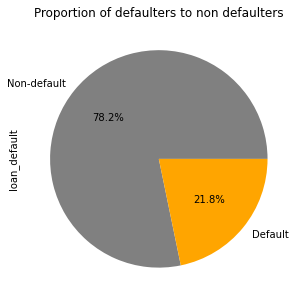

In [36]:
df.loan_default.value_counts().plot(kind="pie",labels=["Non-default","Default"],colors=["grey","orange"],autopct='%1.1f%%',figsize=(15,5),title="Proportion of defaulters to non defaulters")


### Study the distribution of the target variable across various categories like branch, state, supplier, manufacturer.

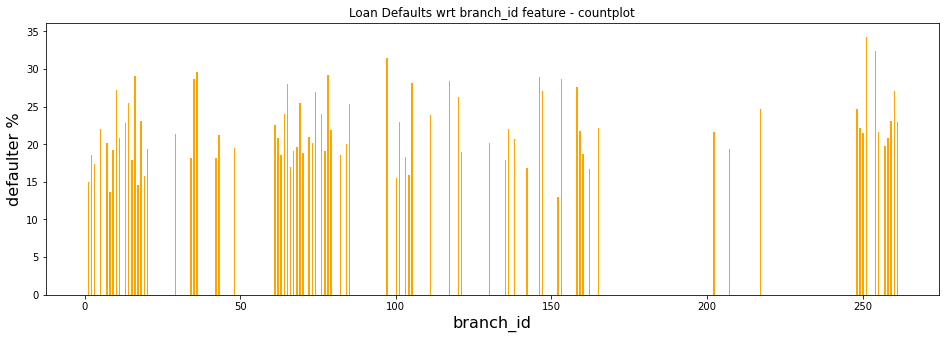

In [37]:
plotUnivariateRatioBar("branch_id",figsize=(16,5))

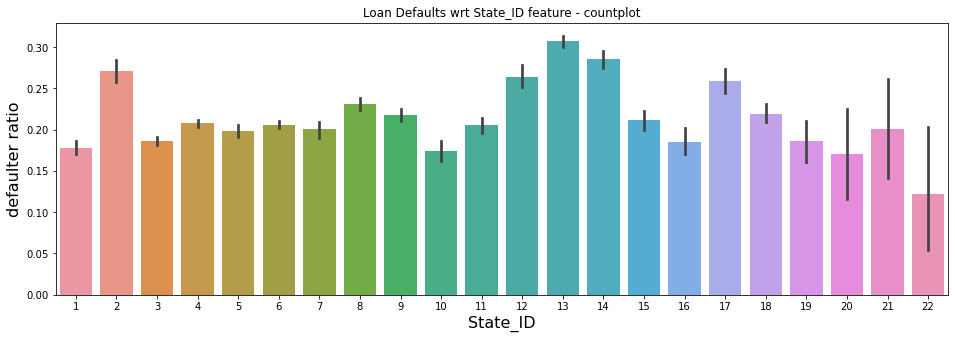

In [38]:
plotUnivariateBar("State_ID",figsize=(16,5))

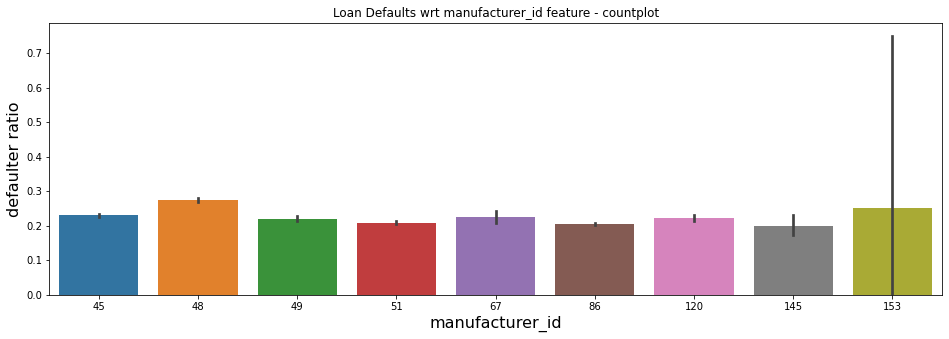

In [39]:
plotUnivariateBar("manufacturer_id",figsize=(16,5))

#### Defaults by employment type

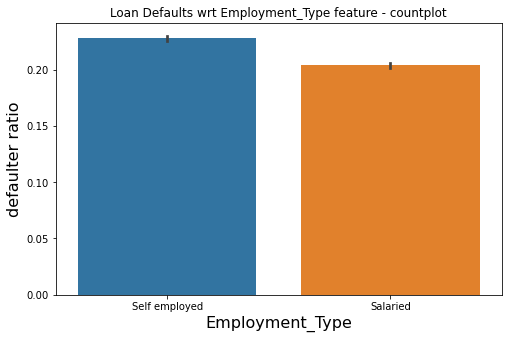

In [40]:
plotUnivariateBar("Employment_Type",figsize=(8,5))

<AxesSubplot:title={'center':'Proportion of defaults for salaried workers'}, ylabel='Salaried'>

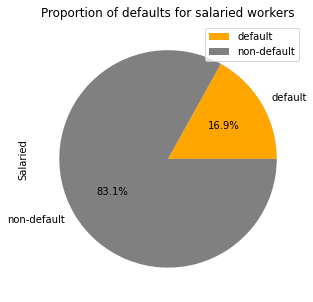

In [41]:
df.pivot_table(index="Employment_Type",values="loan_default",aggfunc=["sum","count"]).T.plot(y="Salaried",kind="pie",title="Proportion of defaults for salaried workers",labels=["default","non-default"],colors=["orange","grey"],autopct='%1.1f%%',figsize=(10,5))
                                                                                            
        

<AxesSubplot:title={'center':'Proportion of defaults for self employed owners'}, ylabel='Self employed'>

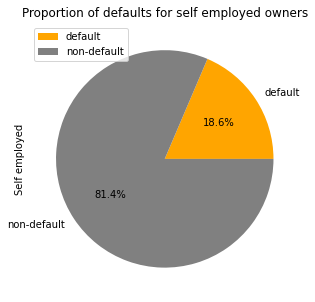

In [42]:
df.pivot_table(index="Employment_Type",values="loan_default",aggfunc=["sum","count"]).T.plot(y="Self employed",kind="pie",title="Proportion of defaults for self employed owners",labels=["default","non-default"],colors=["orange","grey"],autopct='%1.1f%%',figsize=(10,5))

### Plotting employment with respect to loan default ratio based on amount in current account

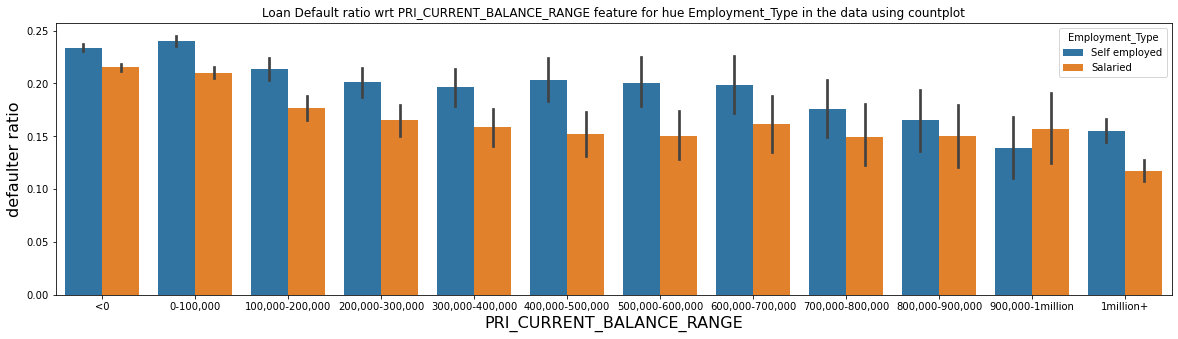

In [43]:
plotBivariateBar("PRI_CURRENT_BALANCE_RANGE","Employment_Type",figsize=(20,5))

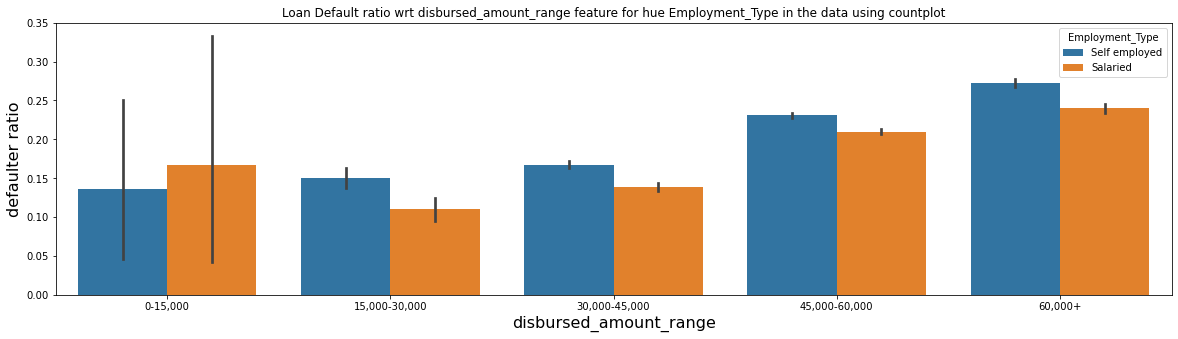

In [44]:
plotBivariateBar("disbursed_amount_range","Employment_Type",figsize=(20,5))

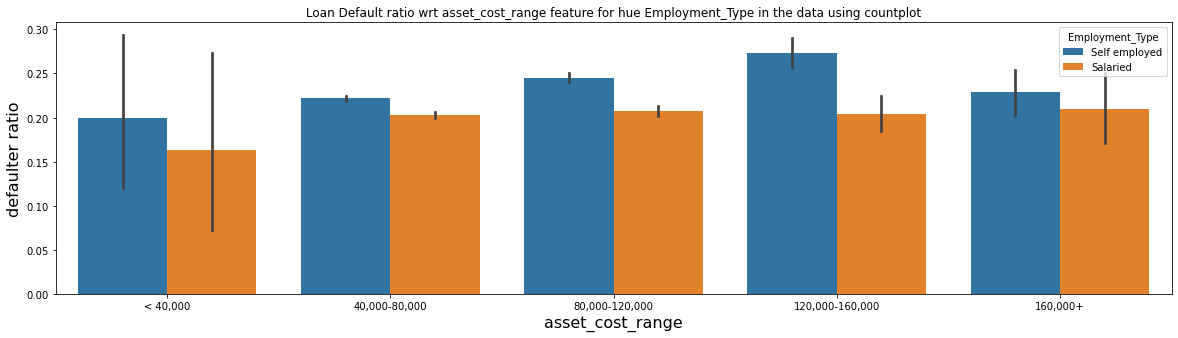

In [45]:
plotBivariateBar("asset_cost_range","Employment_Type",figsize=(20,5))

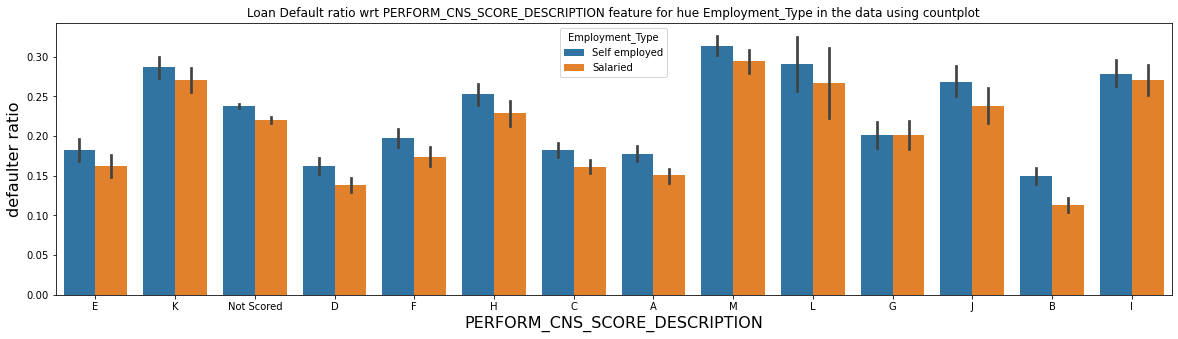

In [46]:
plotBivariateBar("PERFORM_CNS_SCORE_DESCRIPTION","Employment_Type",figsize=(20,5))

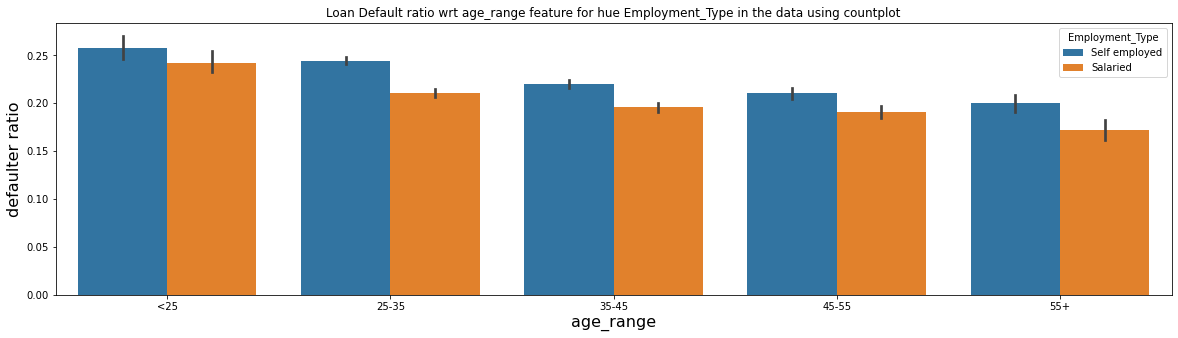

In [47]:
plotBivariateBar("age_range","Employment_Type",figsize=(20,5))

### Has age got anything to do with defaulting? What is the distribution of age w.r.t. to the defaulters and non-defaulters?

In [48]:
now = pd.Timestamp('now')

In [49]:
df["age"] = (now - df["Date_of_Birth"]).astype('<m8[Y]')

In [50]:
### Age bins
bins5 = [0,25,35,45,55,75]
bins_labels5 = ["<25", "25-35", "35-45","45-55","55+"]
df["age_range"] = pd.cut(df["age"],bins5,labels=bins_labels5)

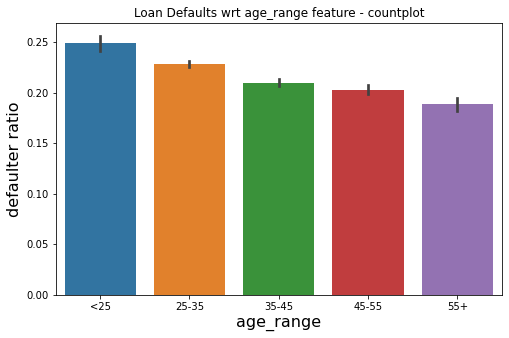

In [51]:
plotUnivariateBar("age_range",figsize=(8,5))

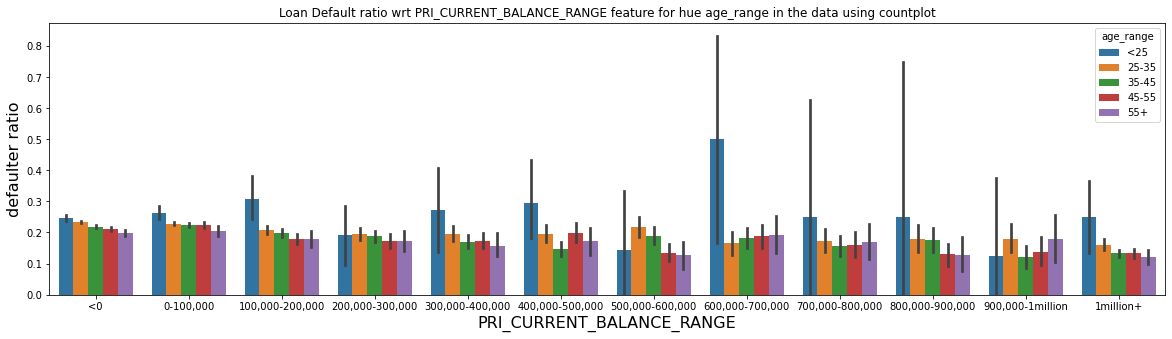

In [52]:
plotBivariateBar("PRI_CURRENT_BALANCE_RANGE","age_range",figsize=(20,5))

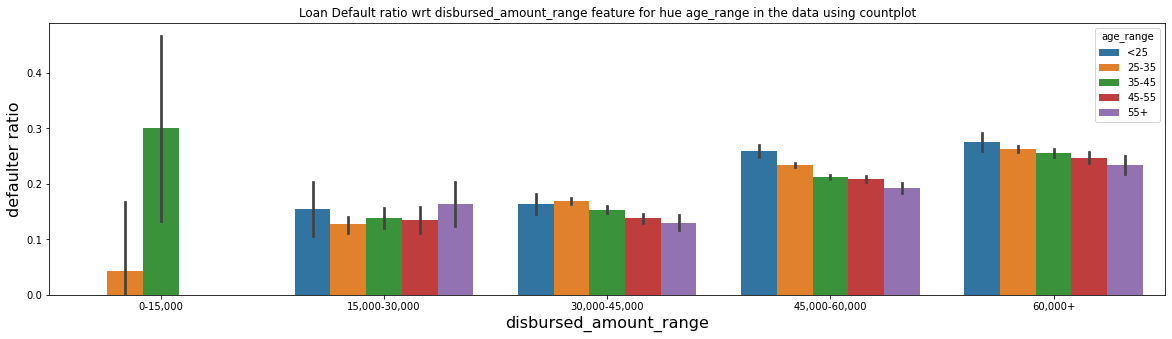

In [53]:
plotBivariateBar("disbursed_amount_range","age_range",figsize=(20,5))

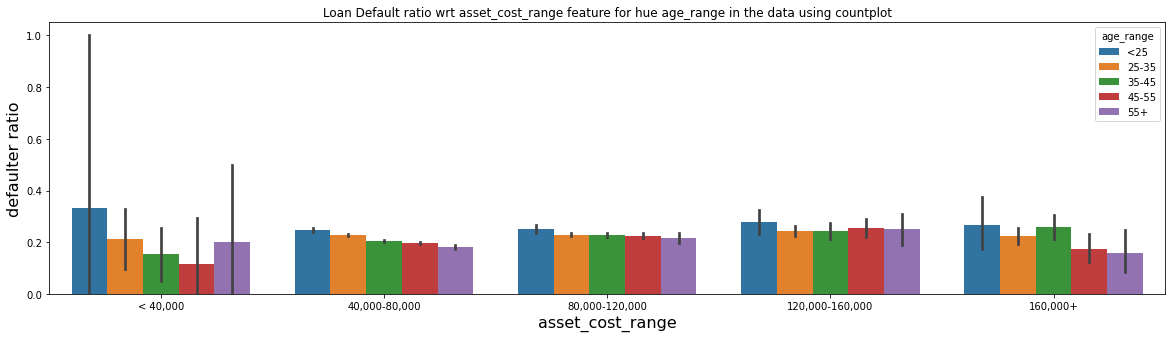

In [54]:
plotBivariateBar("asset_cost_range","age_range",figsize=(20,5))

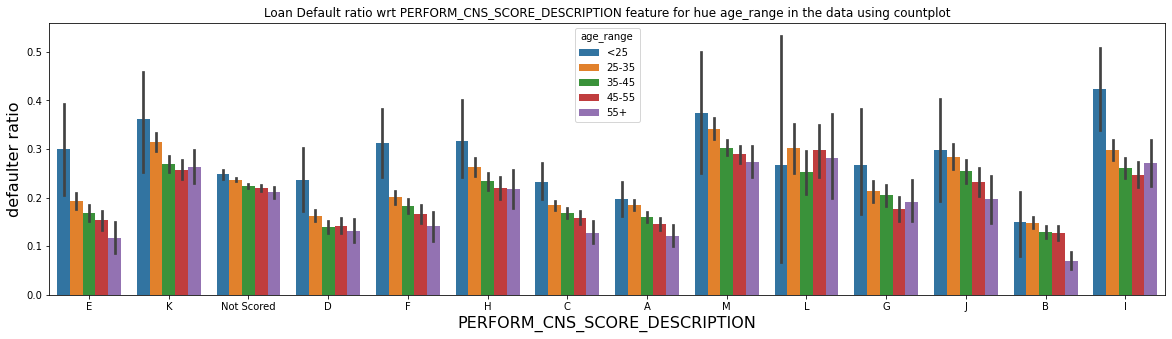

In [55]:
plotBivariateBar("PERFORM_CNS_SCORE_DESCRIPTION","age_range",figsize=(20,5))

#### What type of ID was presented by most of the customers for proof?

In [56]:
id_types = ["MobileNo_Avl_Flag","Aadhar_flag","PAN_flag","VoterID_flag","Driving_flag","Passport_flag"]

<AxesSubplot:>

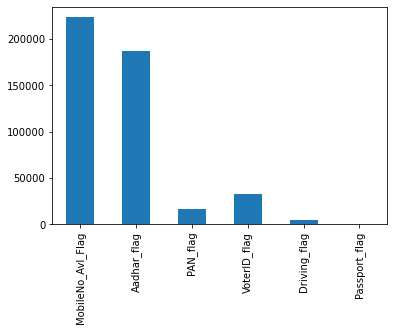

In [57]:
df[id_types].sum().plot(kind="bar")

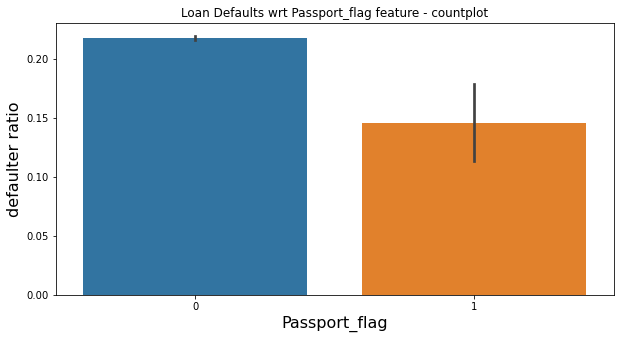

In [58]:
plotUnivariateBar("Passport_flag",figsize=(10,5))

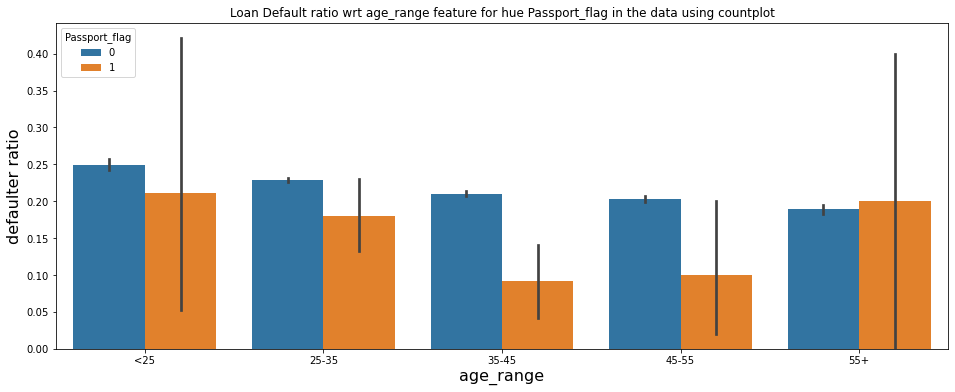

In [59]:
plotBivariateBar("age_range","Passport_flag")

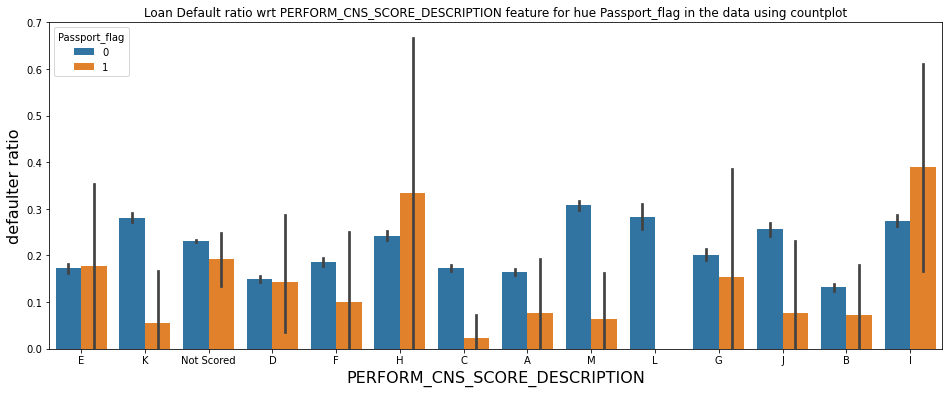

In [60]:
plotBivariateBar("PERFORM_CNS_SCORE_DESCRIPTION","Passport_flag")

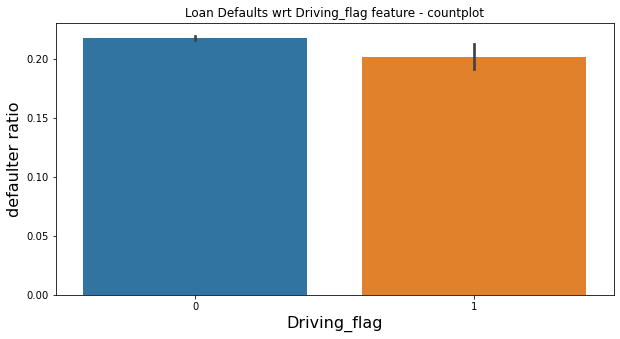

In [61]:
plotUnivariateBar("Driving_flag",figsize=(10,5))

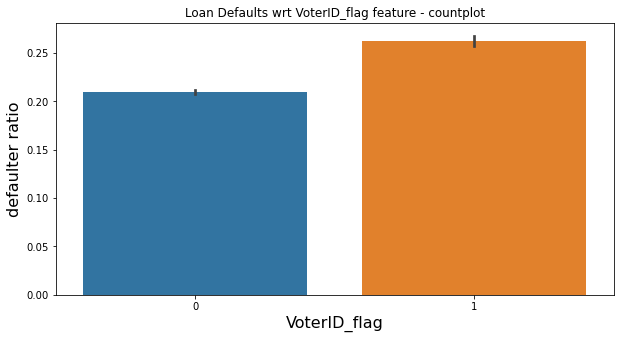

In [62]:
plotUnivariateBar("VoterID_flag",figsize=(10,5))

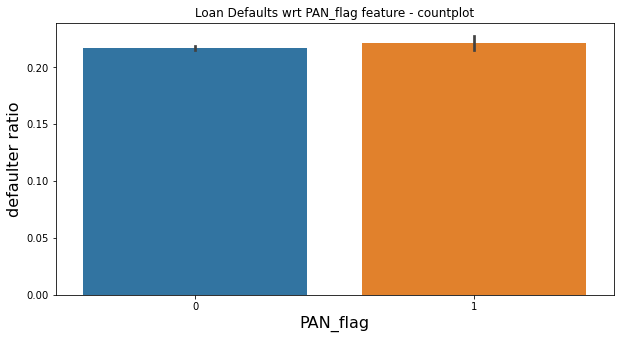

In [63]:
plotUnivariateBar("PAN_flag",figsize=(10,5))

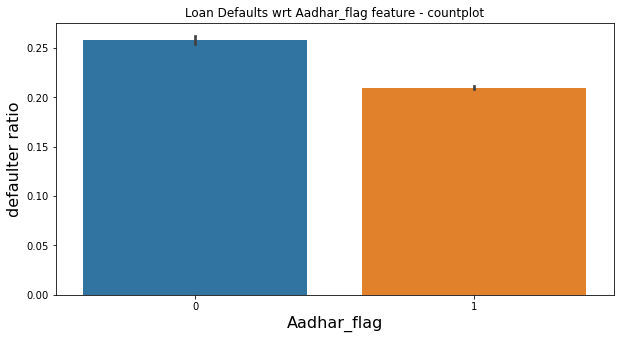

In [64]:
plotUnivariateBar("Aadhar_flag",figsize=(10,5))

#### Study the credit bureau score distribution. Compare the distribution for defaulters vs. non-defaulters. Explore in detail.

In [65]:
old_titles = df.PERFORM_CNS_SCORE_DESCRIPTION.unique()

In [66]:
NA_values = ["No Bureau History Available","Not Scored: No Activity seen on the customer (Inactive)","Not Scored: Only a Guarantor","Not Scored: No Updates available in last 36 months","Not Scored: Sufficient History Not Available","Not Scored: Not Enough Info available on the customer","Not Scored: More than 50 active Accounts found"]
new_titles = ["E","K","Not Scored","D","F","H","C","A","M","L","G","J","B","I"]

In [67]:
df.loc[:,"PERFORM_CNS_SCORE_DESCRIPTION"] = df.loc[:,"PERFORM_CNS_SCORE_DESCRIPTION"].replace(NA_values,"Not Scored")

In [68]:
old_titles = df.PERFORM_CNS_SCORE_DESCRIPTION.unique()

In [69]:
df.loc[:,"PERFORM_CNS_SCORE_DESCRIPTION"] = df.loc[:,"PERFORM_CNS_SCORE_DESCRIPTION"].replace(old_titles,new_titles)

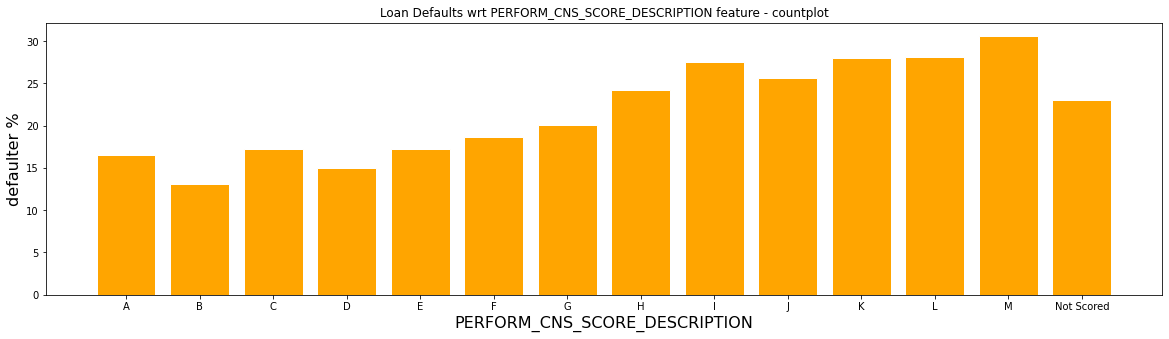

In [70]:
plotUnivariateRatioBar("PERFORM_CNS_SCORE_DESCRIPTION",figsize=(20,5))

#### Explore the primary and secondary account details. Is the information in some way related to the loan default probability?

### Do the number of previous primary and secondary accounts affect the default ratio?

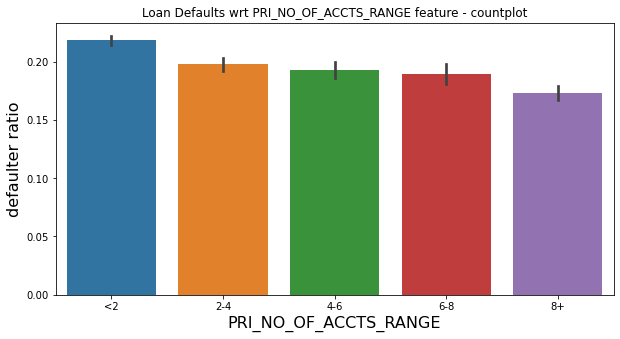

In [71]:
plotUnivariateBar("PRI_NO_OF_ACCTS_RANGE",figsize=(10,5))

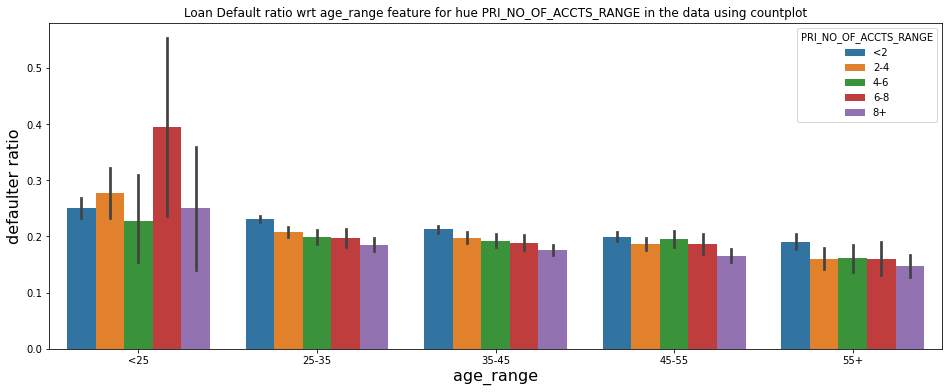

In [72]:
plotBivariateBar("age_range","PRI_NO_OF_ACCTS_RANGE")

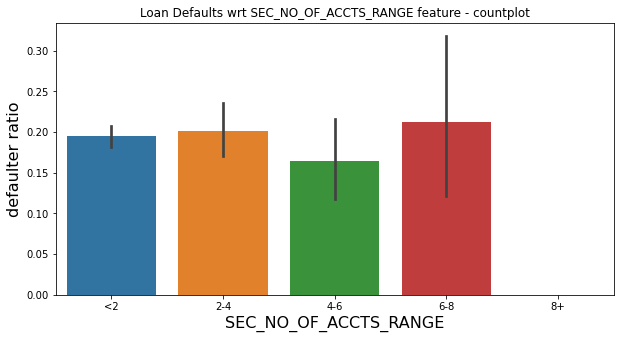

In [73]:
plotUnivariateBar("SEC_NO_OF_ACCTS_RANGE",figsize=(10,5))

### Does the number of current primary and secondary accounts affect the default ratio?

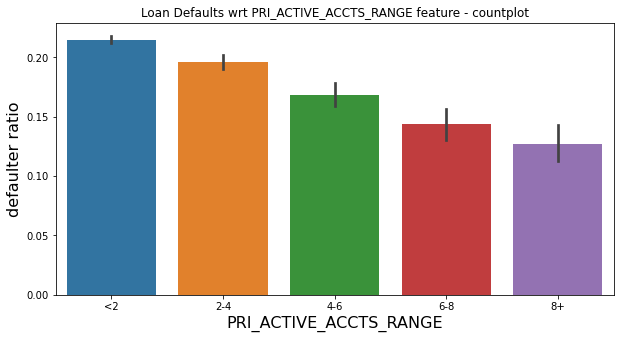

In [74]:
plotUnivariateBar("PRI_ACTIVE_ACCTS_RANGE",figsize=(10,5))

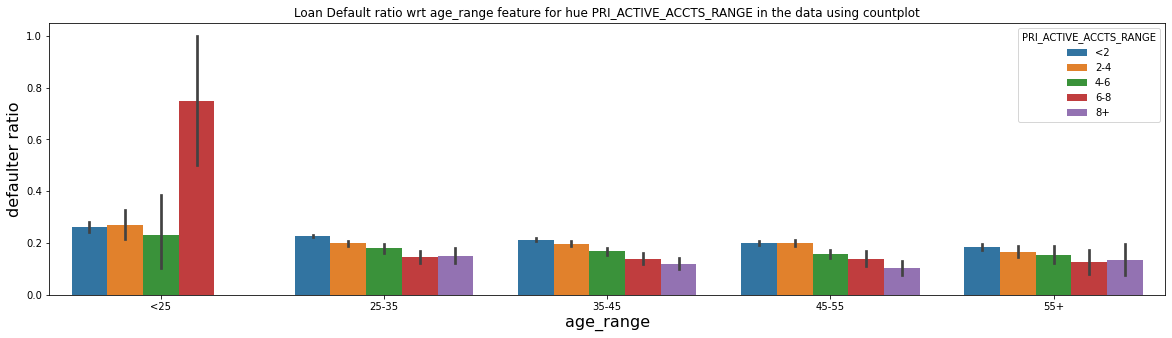

In [75]:
plotBivariateBar("age_range","PRI_ACTIVE_ACCTS_RANGE",figsize=(20,5))

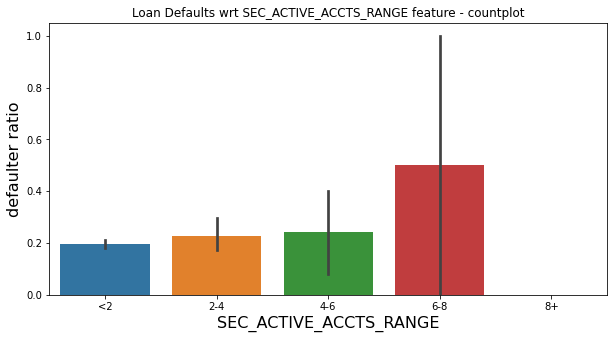

In [76]:
plotUnivariateBar("SEC_ACTIVE_ACCTS_RANGE",figsize=(10,5))

### Does the number of overdue primary and secondary accounts affect the loan default ratio?

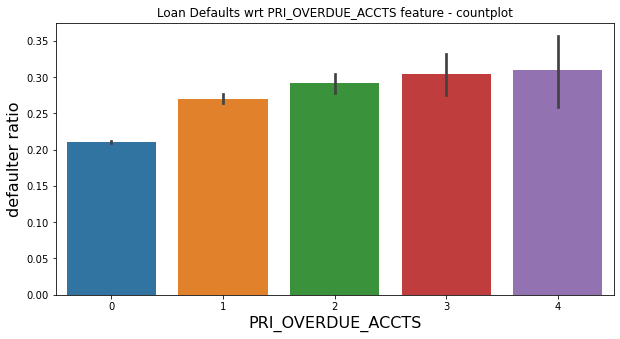

In [77]:
plotUnivariateBar("PRI_OVERDUE_ACCTS",figsize=(10,5))

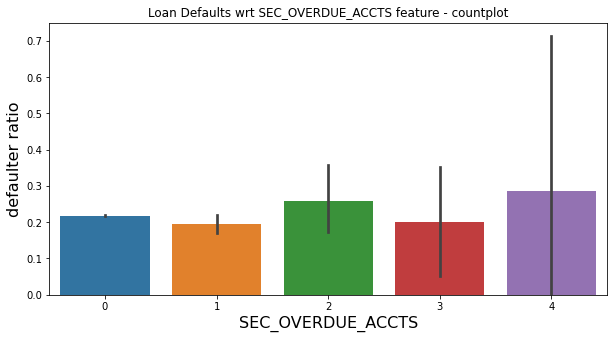

In [78]:
plotUnivariateBar("SEC_OVERDUE_ACCTS",figsize=(10,5))

### Does the current balance for primary and secondary accounts affect the loan default ratio? 

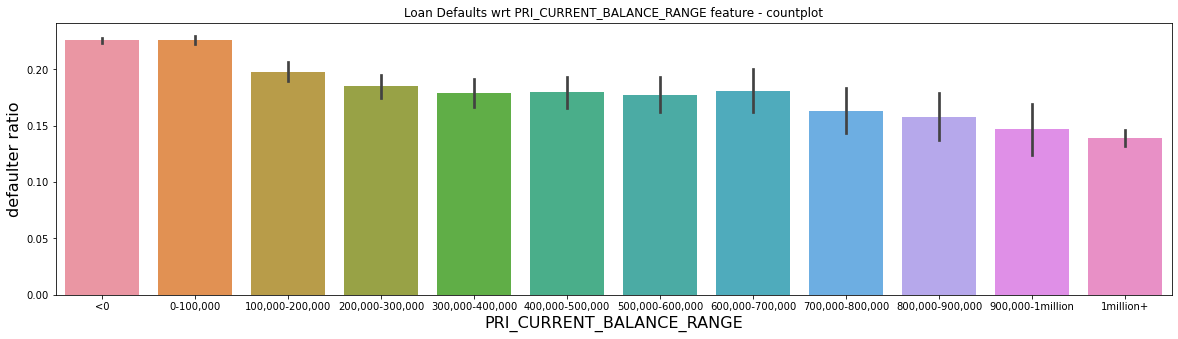

In [79]:
plotUnivariateBar("PRI_CURRENT_BALANCE_RANGE",figsize=(20,5))

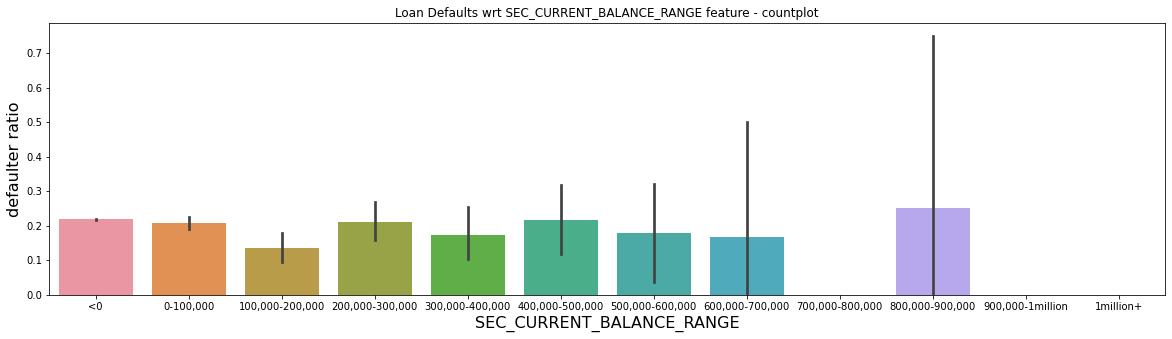

In [80]:
plotUnivariateBar("SEC_CURRENT_BALANCE_RANGE",figsize=(20,5))

### Does the sancioned amount on primary and secondary accounts affect the loan default ratio?  

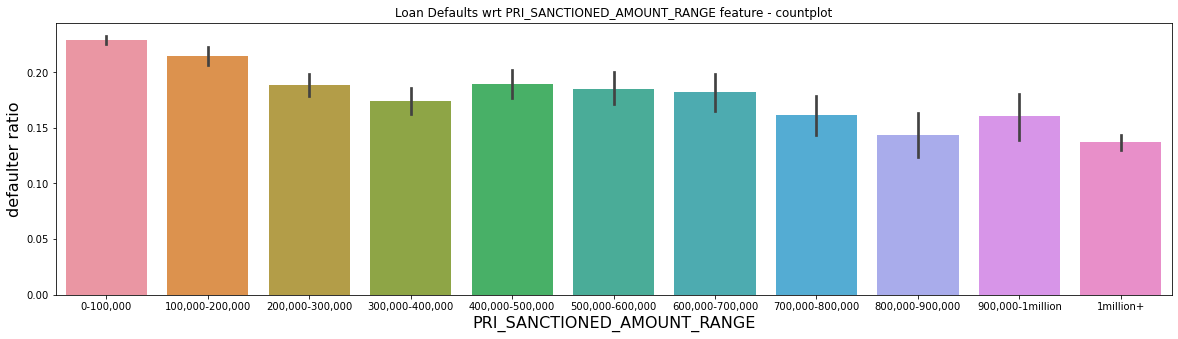

In [81]:
plotUnivariateBar("PRI_SANCTIONED_AMOUNT_RANGE",figsize=(20,5))

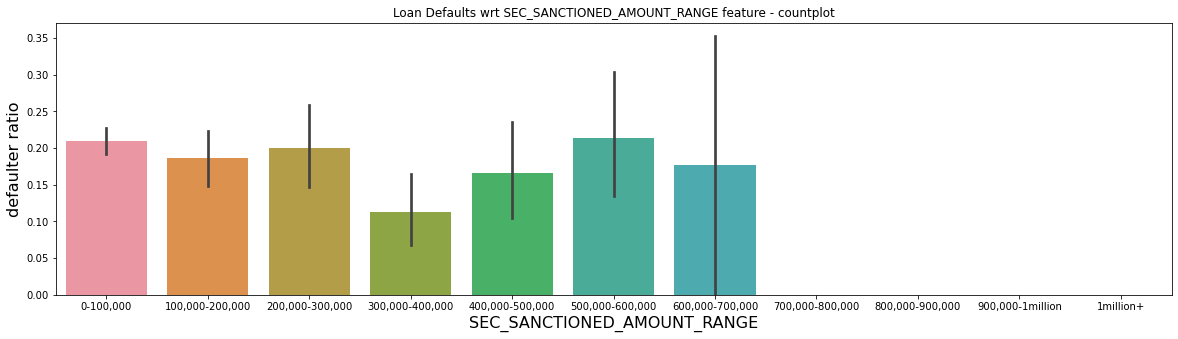

In [82]:
plotUnivariateBar("SEC_SANCTIONED_AMOUNT_RANGE",figsize=(20,5))

#### Does the disbursed amount for primary and secondary accounts affect the loan default ratio?

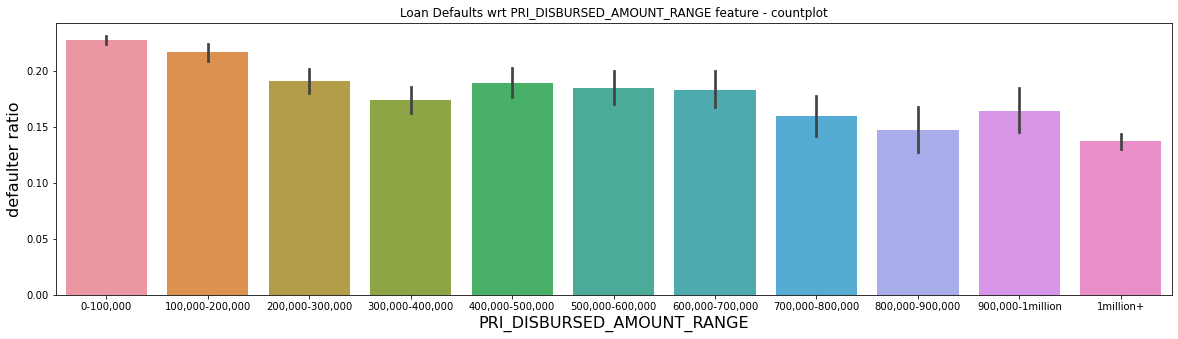

In [83]:
plotUnivariateBar("PRI_DISBURSED_AMOUNT_RANGE",figsize=(20,5))

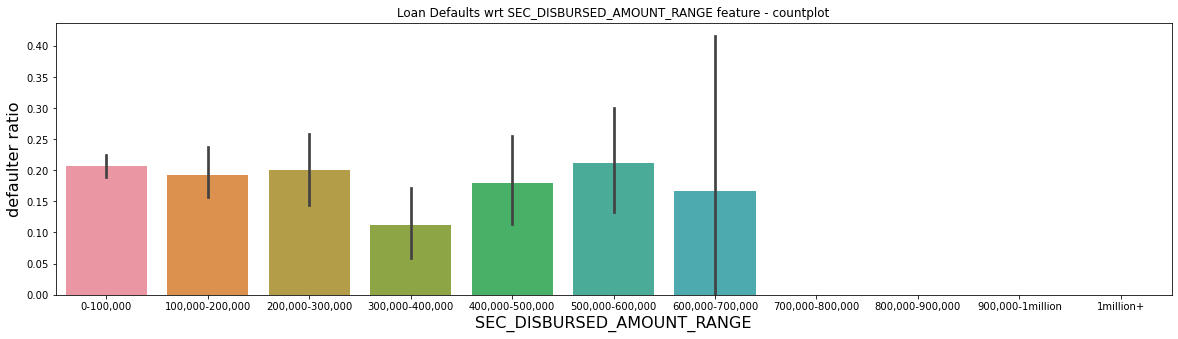

In [84]:
plotUnivariateBar("SEC_DISBURSED_AMOUNT_RANGE",figsize=(20,5))

### Do customers who make a higher number of enquiries end up being higher risk candidates?

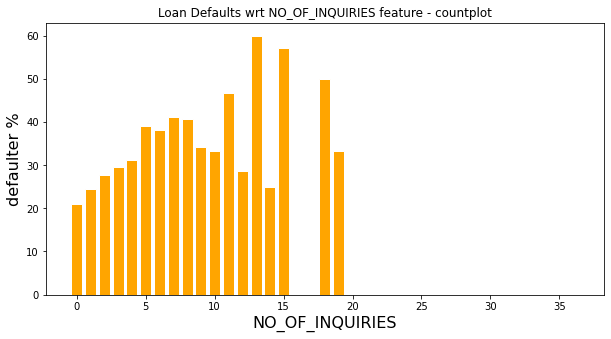

In [85]:
plotUnivariateRatioBar("NO_OF_INQUIRIES",figsize=(10,5))

### Is credit history, that is new loans in last six months, loans defaulted in last six months, time since first loan, etc., a significant factor in estimating probability of loan defaulters?

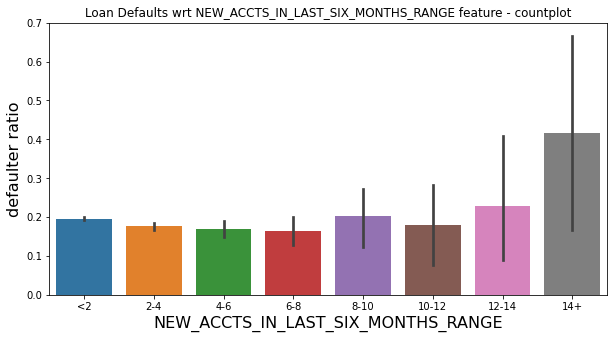

In [86]:
plotUnivariateBar("NEW_ACCTS_IN_LAST_SIX_MONTHS_RANGE",figsize=(10,5))

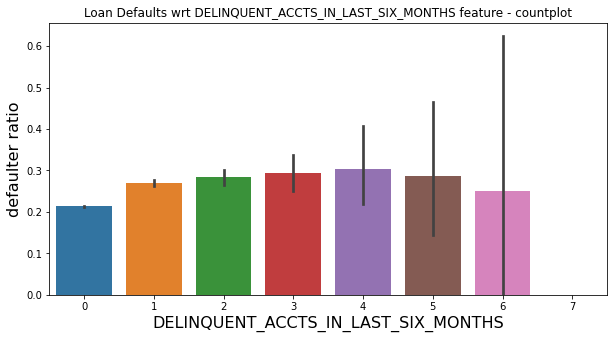

In [87]:
plotUnivariateBar("DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",figsize=(10,5))

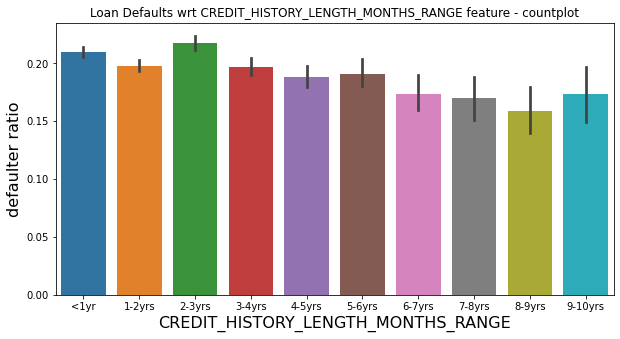

In [88]:
plotUnivariateBar("CREDIT_HISTORY_LENGTH_MONTHS_RANGE",figsize=(10,5))

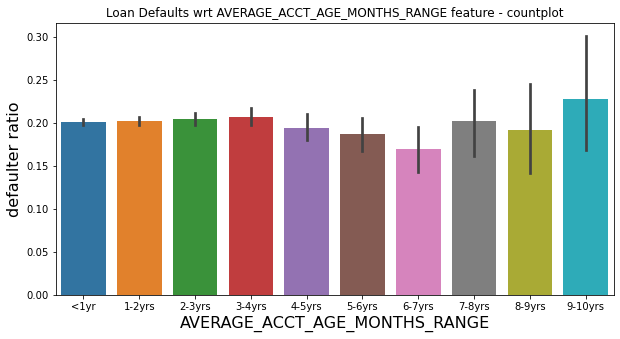

In [89]:
plotUnivariateBar("AVERAGE_ACCT_AGE_MONTHS_RANGE",figsize=(10,5))

## Analysis of variation 

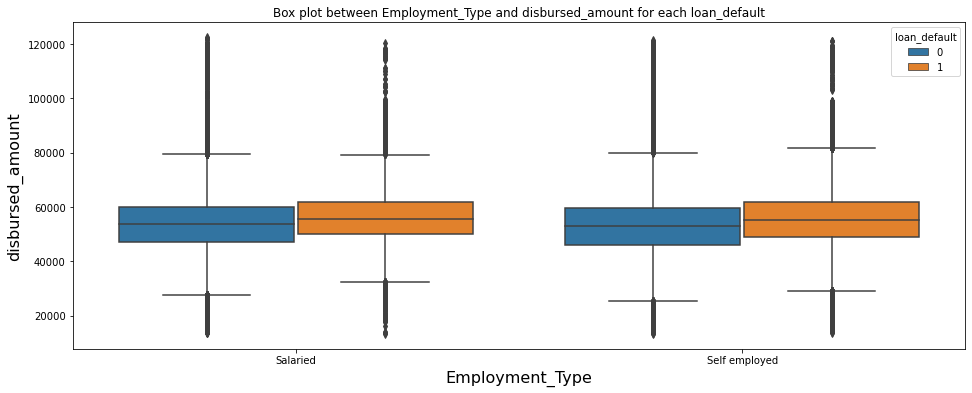

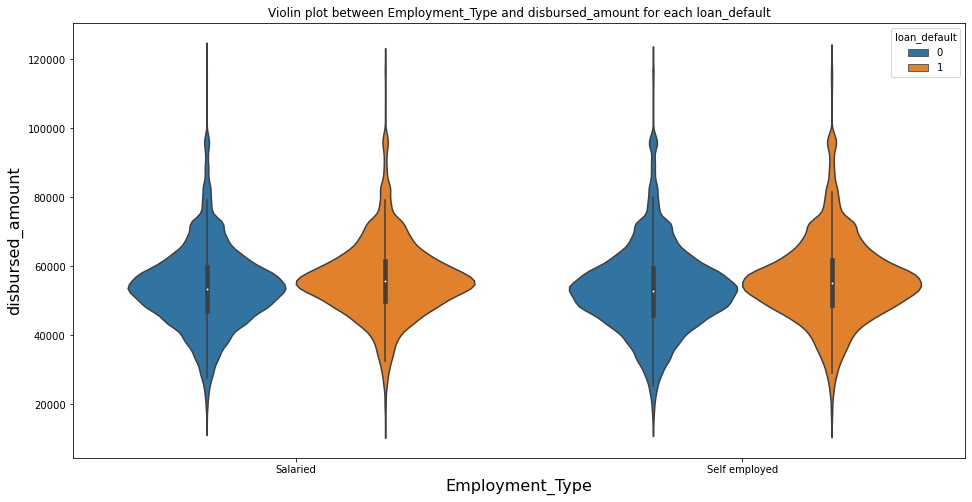

In [90]:
plotBox("Employment_Type","disbursed_amount")

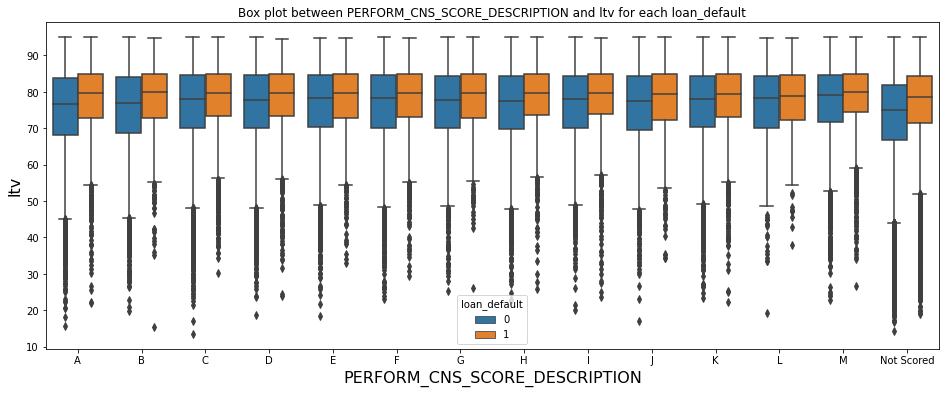

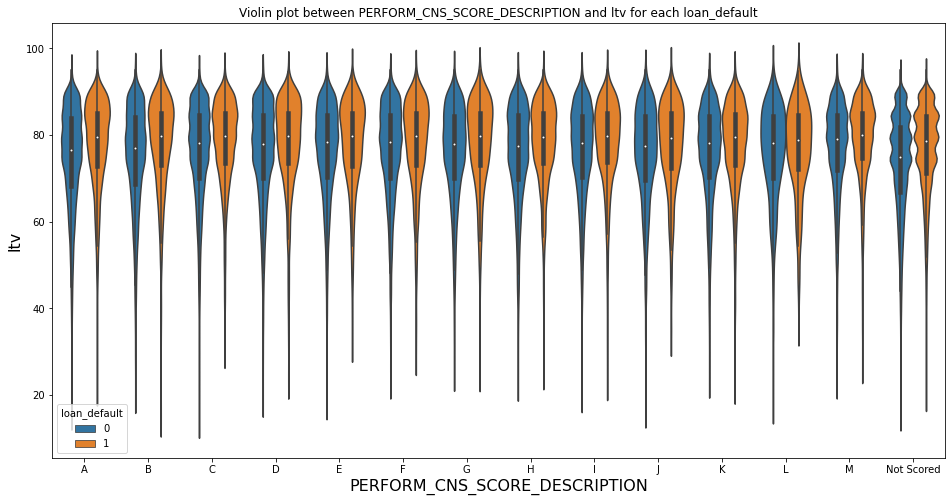

In [91]:
plotBox("PERFORM_CNS_SCORE_DESCRIPTION","ltv","loan_default")

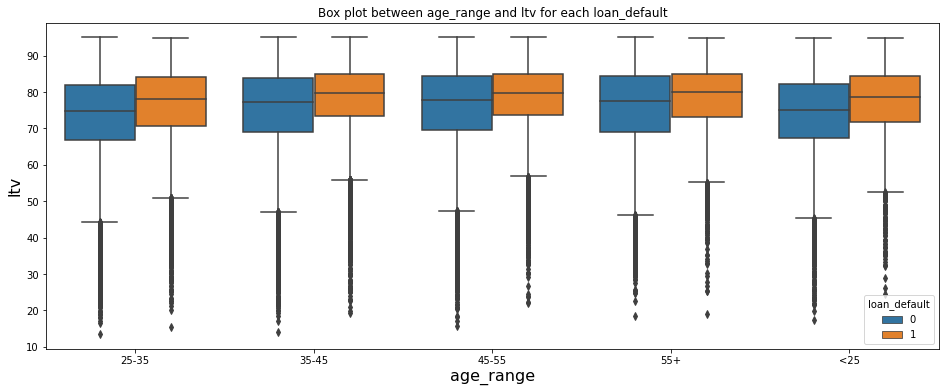

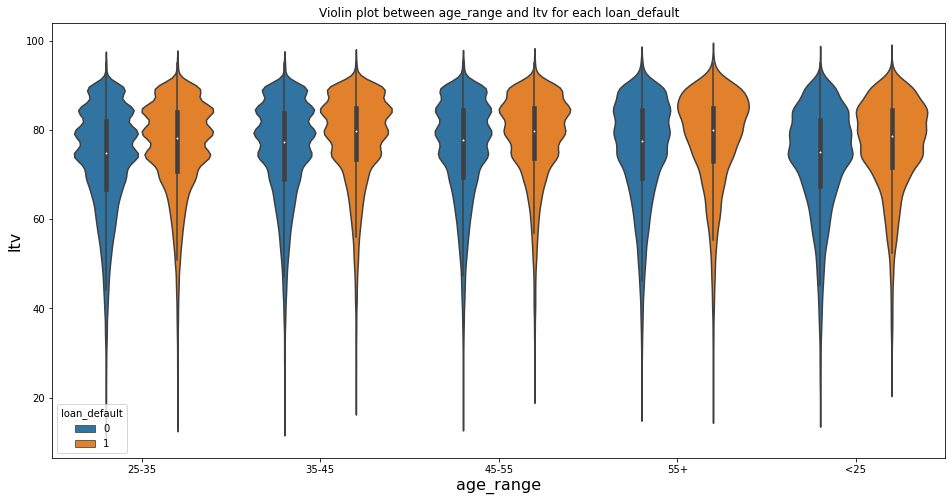

In [92]:
plotBox("age_range","ltv","loan_default")

In [93]:
## Heatmap showing the correlation between variables

continuous_variables = ["loan_default","disbursed_amount","AVERAGE_ACCT_AGE_MONTHS","asset_cost","PRI_NO_OF_ACCTS","SEC_NO_OF_ACCTS","PRI_CURRENT_BALANCE","SEC_CURRENT_BALANCE","PRI_SANCTIONED_AMOUNT","SEC_SANCTIONED_AMOUNT","PRI_DISBURSED_AMOUNT","SEC_DISBURSED_AMOUNT","NEW_ACCTS_IN_LAST_SIX_MONTHS","CREDIT_HISTORY_LENGTH_MONTHS","AVERAGE_ACCT_AGE_MONTHS","PRI_ACTIVE_ACCTS","SEC_ACTIVE_ACCTS"]

corr_matrix = df[continuous_variables].corr()

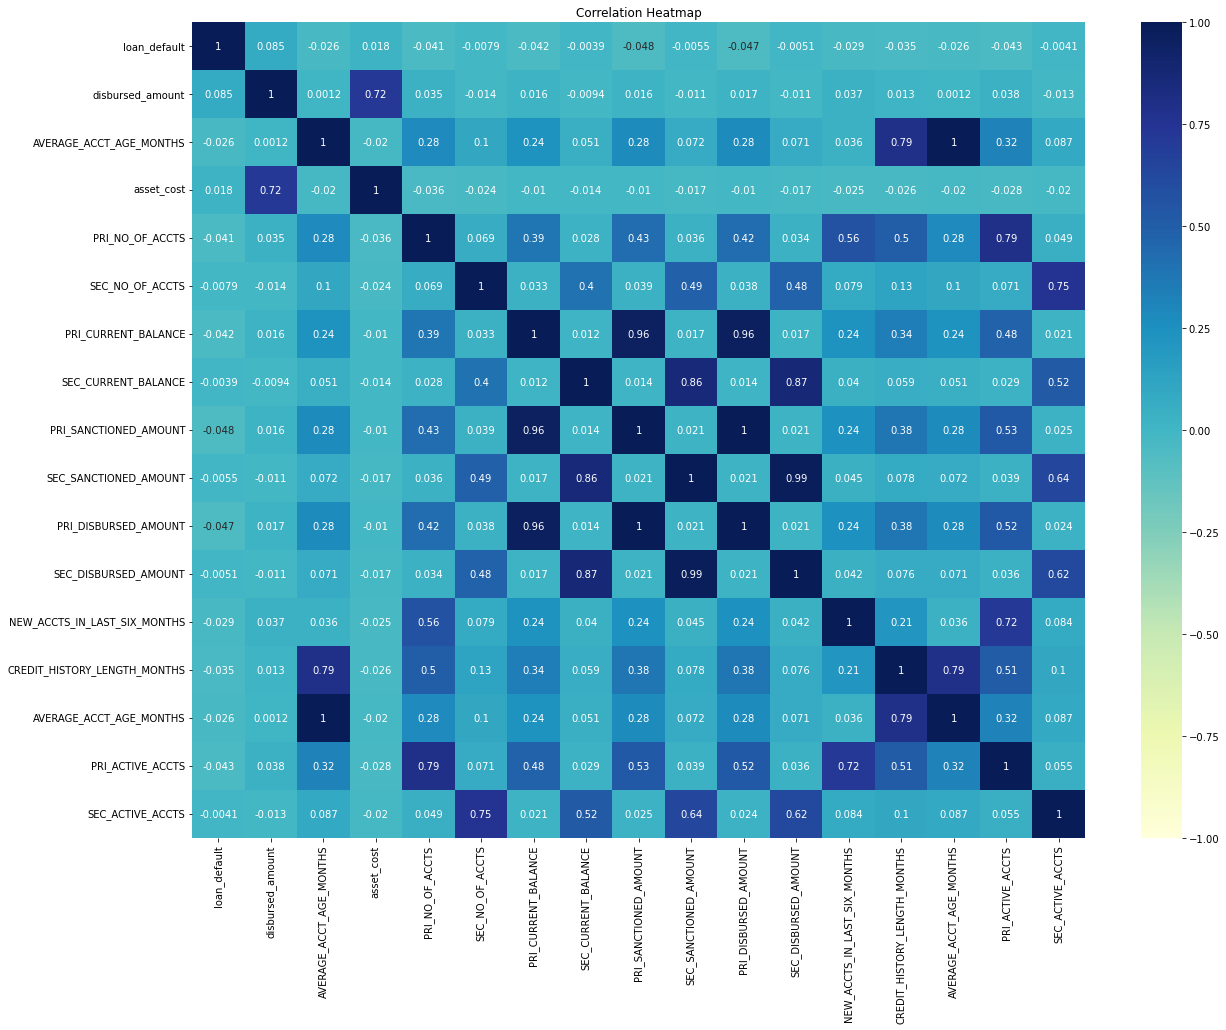

In [94]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()